# Prueba Dickey-Fuller

La prueba Dickey-Fuller, especialmente en su versión aumentada (ADF), se usa para saber si una serie de tiempo es estacionaria o no, es decir, si sus valores se mantienen estables en el tiempo. Esto es clave porque trabajar con series no estacionarias puede llevar a errores o conclusiones engañosas. Si el valor-p de la prueba es menor a 0.05, significa que la serie sí es estacionaria. Si no, hay que transformarla, por ejemplo, aplicando diferenciación. Esta prueba se usa antes de aplicar modelos como ARIMA y ayuda a evitar regresiones espurias. En resumen, nos dice si la serie está lista para ser modelada correctamente.

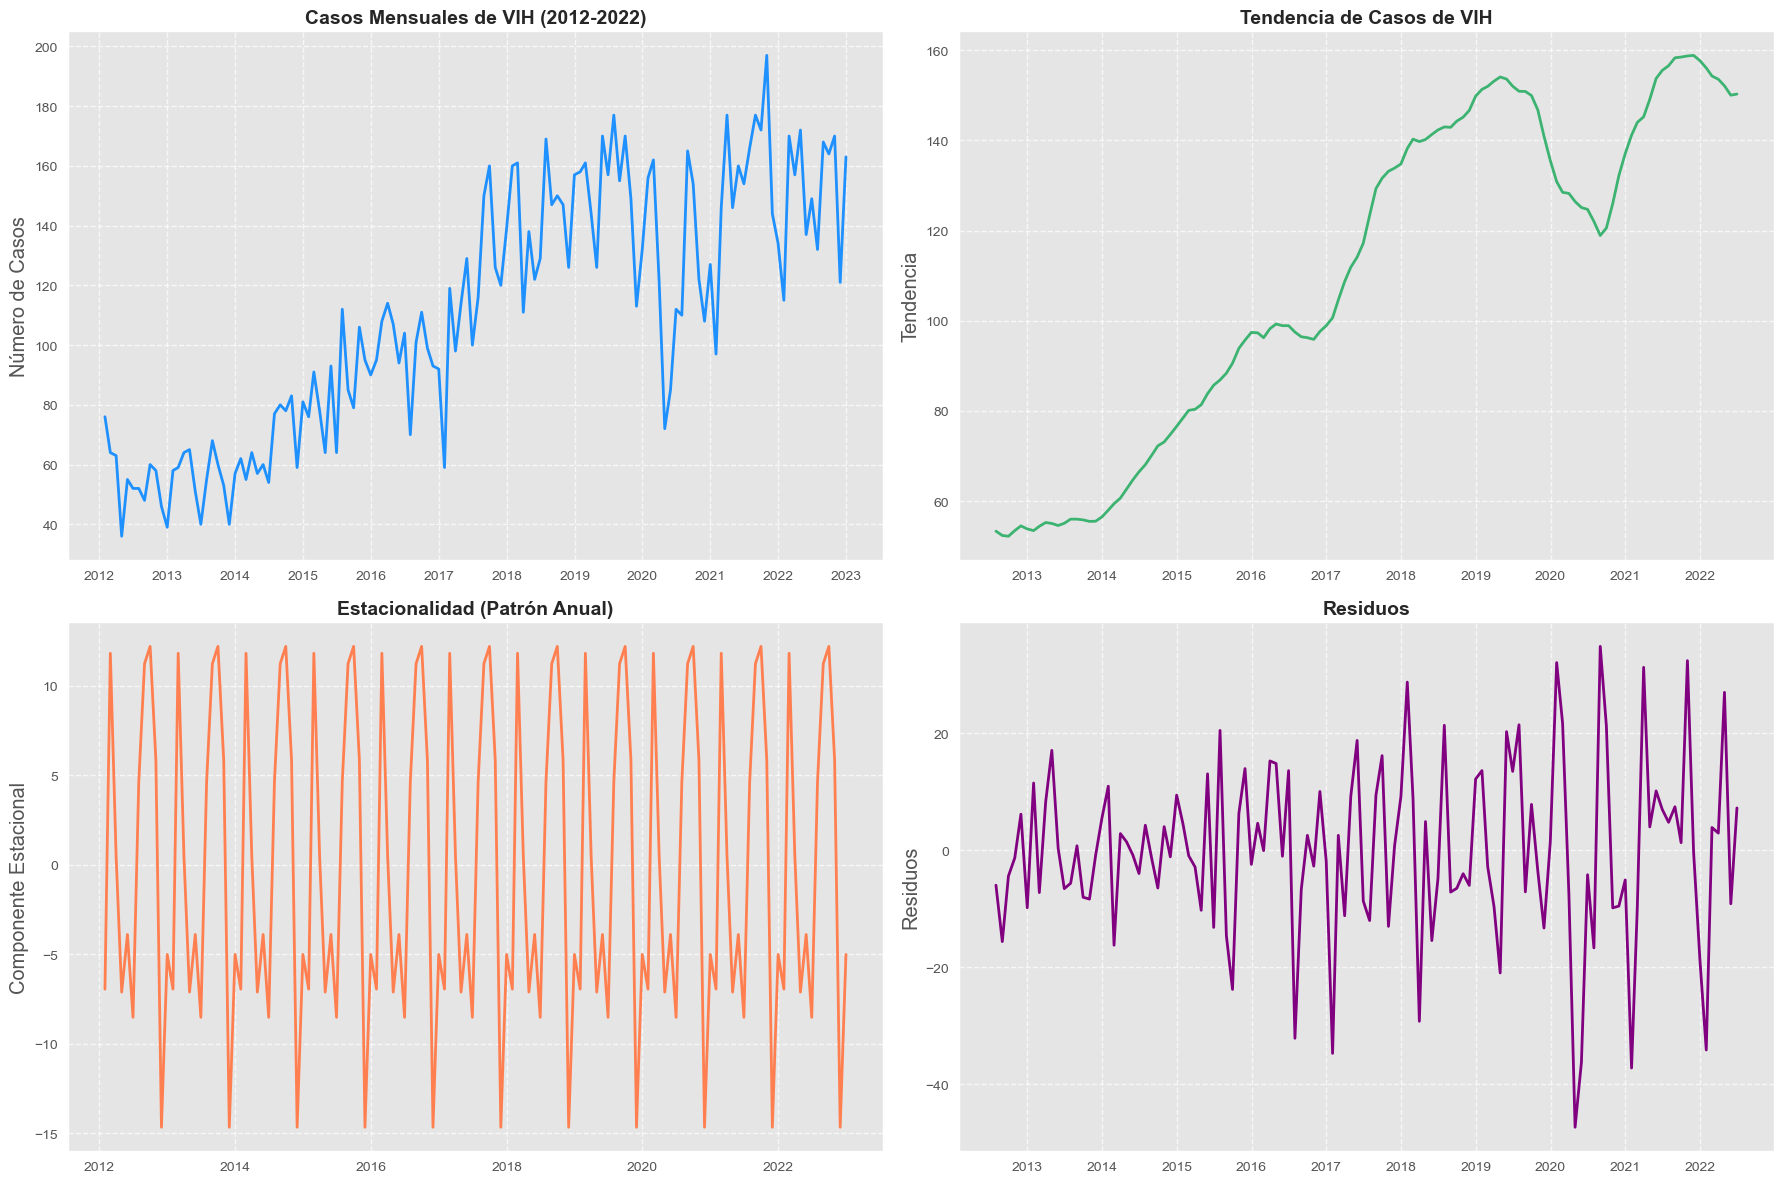

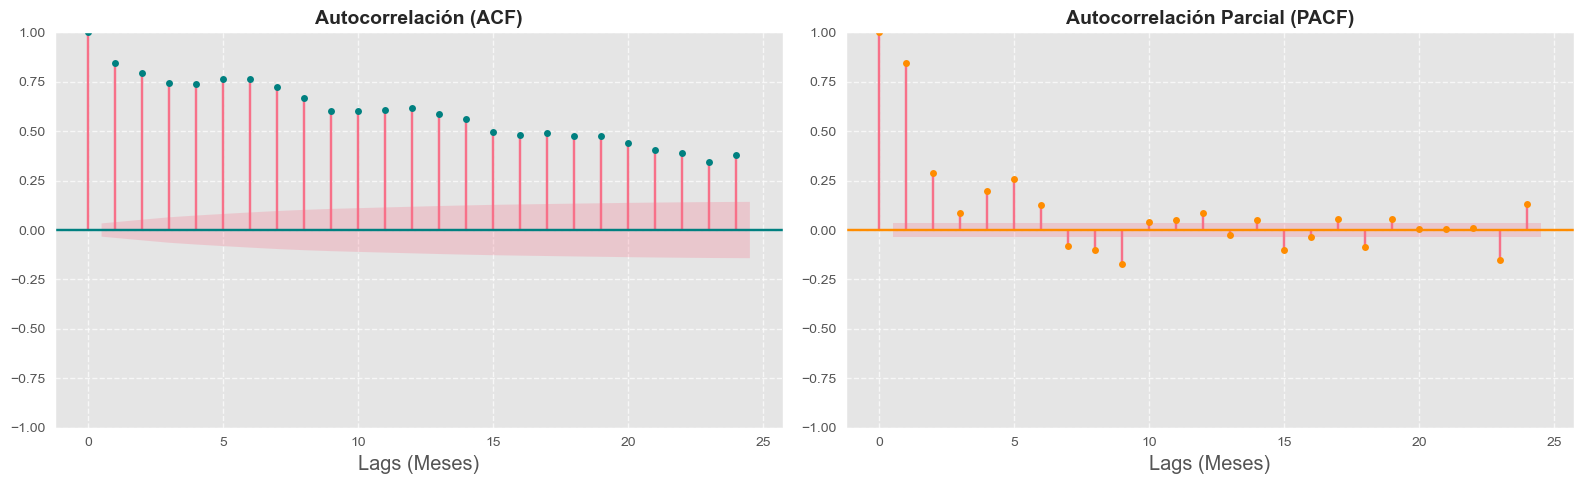


PRUEBA DICKEY-FULLER AUMENTADA (ADF) PARA ESTACIONARIEDAD

Estadístico ADF: -1.0389425807985184
p-value: 0.7387973287517635
Valores Críticos:
   1%: -3.4833462346078936
   5%: -2.8847655969877666
   10%: -2.5791564575459813

Conclusión: No podemos rechazar la hipótesis nula (p-value > 0.05)
La serie temporal TIENE una raíz unitaria y es NO ESTACIONARIA


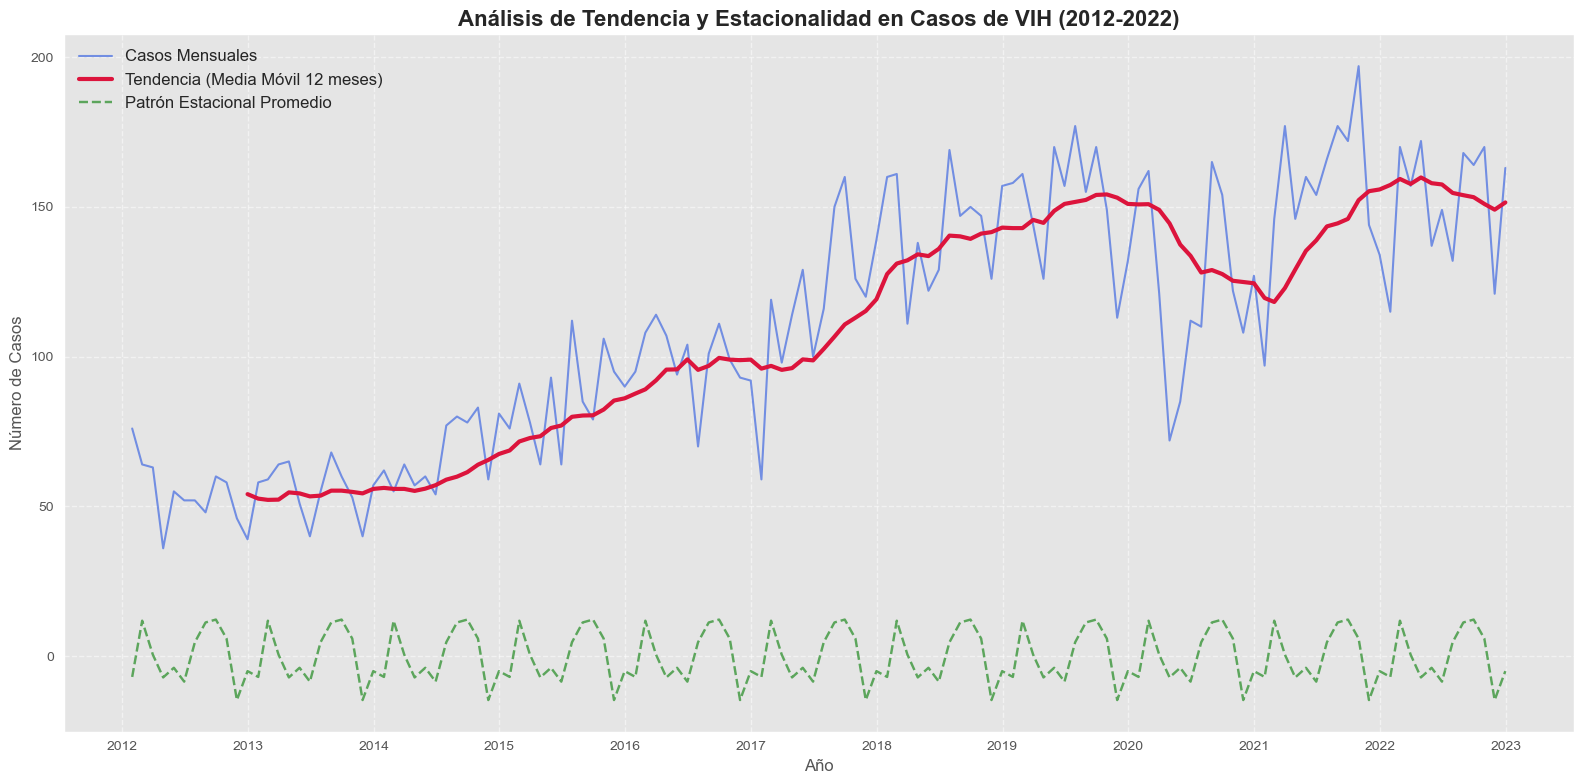

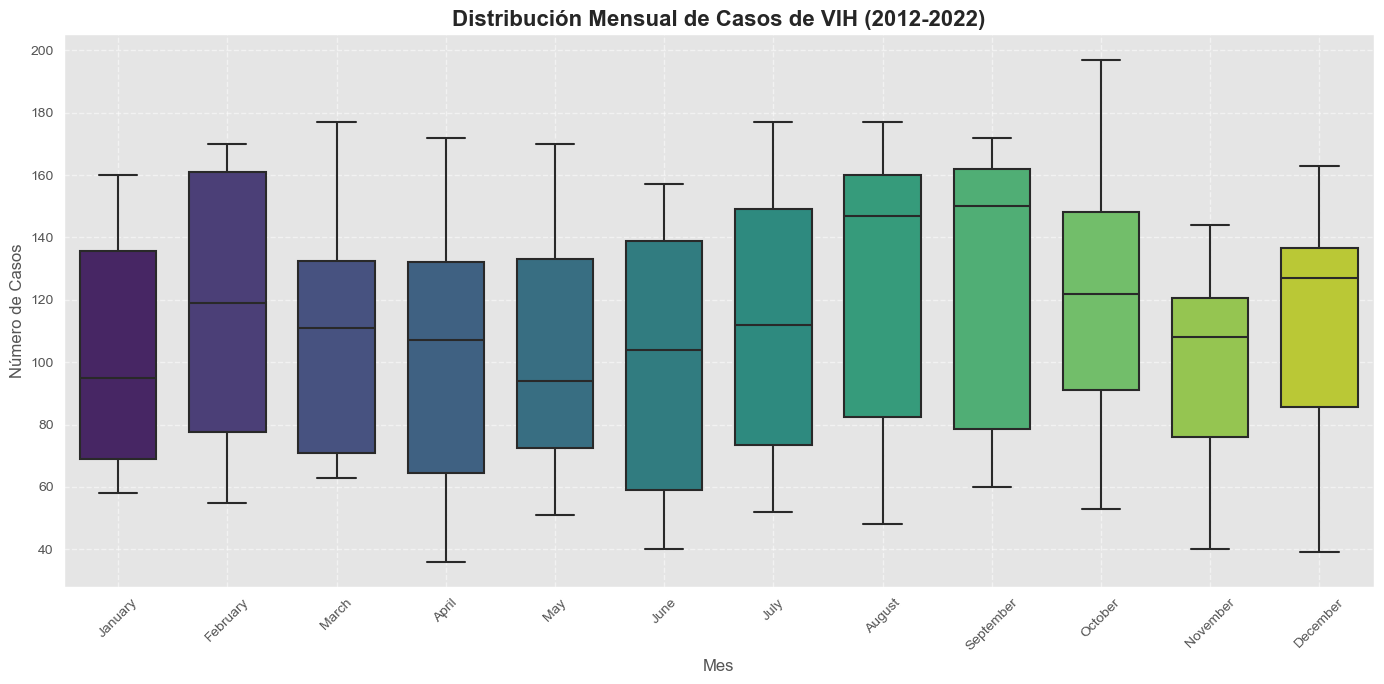


RESUMEN ESTADÍSTICO DE LA SERIE TEMPORAL (2012-2022)

count   132.000
mean    109.780
std      41.897
min      36.000
25%      69.500
50%     111.000
75%     149.000
max     197.000
dtype: float64

Total de casos por año:
Fecha
2012-12-31     649
2013-12-31     670
2014-12-31     810
2015-12-31    1033
2016-12-31    1188
2017-12-31    1430
2018-12-31    1717
2019-12-31    1812
2020-12-31    1494
2021-12-31    1870
2022-12-31    1818
Freq: YE-DEC, dtype: int64

Promedio mensual por año:
Fecha
2012    54.083
2013    55.833
2014    67.500
2015    86.083
2016    99.000
2017   119.167
2018   143.083
2019   151.000
2020   124.500
2021   155.833
2022   151.500
dtype: float64

Variación porcentual interanual:
Fecha
2012-12-31       NaN
2013-12-31     3.236
2014-12-31    20.896
2015-12-31    27.531
2016-12-31    15.005
2017-12-31    20.370
2018-12-31    20.070
2019-12-31     5.533
2020-12-31   -17.550
2021-12-31    25.167
2022-12-31    -2.781
Freq: YE-DEC, dtype: float64


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib import dates as mdates
import warnings

# Configuración profesional
warnings.filterwarnings('ignore')
plt.style.use('ggplot')  # Estilo alternativo válido (puedes usar otro de style.available)
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['axes.grid'] = True
plt.rcParams['font.size'] = 12
sns.set_palette("husl")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Cargar datos
df = pd.read_excel('DATASET_VIH_LIMPIO_20250508_1728.xlsx', sheet_name='Datos VIH')

# Convertir fecha y crear índice temporal
df['Fecha'] = pd.to_datetime(df['Fecha'])
df.set_index('Fecha', inplace=True)

# Agrupar por mes (serie temporal mensual)
ts = df.resample('M').size()

# Filtrar para el período 2012-2022
ts = ts['2012':'2022']

## 1. Visualización de la Serie Temporal Profesional
fig, ax = plt.subplots(2, 2, figsize=(18, 12))

# Serie temporal original
ax[0, 0].plot(ts, linewidth=2, color='dodgerblue')
ax[0, 0].set_title('Casos Mensuales de VIH (2012-2022)', fontsize=14, fontweight='bold')
ax[0, 0].set_ylabel('Número de Casos')
ax[0, 0].xaxis.set_major_locator(mdates.YearLocator())
ax[0, 0].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax[0, 0].grid(True, linestyle='--', alpha=0.7)

# Descomposición estacional
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts, model='additive', period=12)

ax[0, 1].plot(decomposition.trend, linewidth=2, color='mediumseagreen')
ax[0, 1].set_title('Tendencia de Casos de VIH', fontsize=14, fontweight='bold')
ax[0, 1].set_ylabel('Tendencia')
ax[0, 1].grid(True, linestyle='--', alpha=0.7)

ax[1, 0].plot(decomposition.seasonal, linewidth=2, color='coral')
ax[1, 0].set_title('Estacionalidad (Patrón Anual)', fontsize=14, fontweight='bold')
ax[1, 0].set_ylabel('Componente Estacional')
ax[1, 0].grid(True, linestyle='--', alpha=0.7)

ax[1, 1].plot(decomposition.resid, linewidth=2, color='purple')
ax[1, 1].set_title('Residuos', fontsize=14, fontweight='bold')
ax[1, 1].set_ylabel('Residuos')
ax[1, 1].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## 2. Análisis de Autocorrelación
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

plot_acf(ts, lags=24, ax=ax[0], color='teal', alpha=0.7)
ax[0].set_title('Autocorrelación (ACF)', fontsize=14, fontweight='bold')
ax[0].set_xlabel('Lags (Meses)')
ax[0].grid(True, linestyle='--', alpha=0.7)

plot_pacf(ts, lags=24, ax=ax[1], color='darkorange', alpha=0.7)
ax[1].set_title('Autocorrelación Parcial (PACF)', fontsize=14, fontweight='bold')
ax[1].set_xlabel('Lags (Meses)')
ax[1].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## 3. Prueba Dickey-Fuller Aumentada (ADF)
print("\n" + "="*70)
print("PRUEBA DICKEY-FULLER AUMENTADA (ADF) PARA ESTACIONARIEDAD")
print("="*70 + "\n")

result = adfuller(ts, autolag='AIC')
print('Estadístico ADF:', result[0])
print('p-value:', result[1])
print('Valores Críticos:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

# Interpretación
if result[1] <= 0.05:
    print("\nConclusión: Rechazamos la hipótesis nula (p-value ≤ 0.05)")
    print("La serie temporal NO tiene una raíz unitaria y es ESTACIONARIA")
else:
    print("\nConclusión: No podemos rechazar la hipótesis nula (p-value > 0.05)")
    print("La serie temporal TIENE una raíz unitaria y es NO ESTACIONARIA")

## 4. Visualización de Tendencia y Estacionalidad con Promedio Móvil
plt.figure(figsize=(16, 8))

# Serie original
plt.plot(ts, label='Casos Mensuales', color='royalblue', alpha=0.7, linewidth=1.5)

# Promedio móvil de 12 meses (tendencia)
rolling_mean = ts.rolling(window=12).mean()
plt.plot(rolling_mean, label='Tendencia (Media Móvil 12 meses)', 
         color='crimson', linewidth=3)

# Componente estacional promedio - Código corregido
seasonal_pattern = decomposition.seasonal.groupby(decomposition.seasonal.index.month).mean()
seasonal_series = pd.Series()

for year in range(2012, 2023):
    monthly_data = pd.Series(seasonal_pattern.values, 
                           index=pd.date_range(start=f'{year}-01-31', periods=12, freq='M'))
    seasonal_series = pd.concat([seasonal_series, monthly_data])

plt.plot(seasonal_series, label='Patrón Estacional Promedio', 
         color='forestgreen', linestyle='--', alpha=0.7)

plt.title('Análisis de Tendencia y Estacionalidad en Casos de VIH (2012-2022)', 
          fontsize=16, fontweight='bold')
plt.xlabel('Año', fontsize=12)
plt.ylabel('Número de Casos', fontsize=12)
plt.legend(fontsize=12, framealpha=1, shadow=True)
plt.grid(True, linestyle='--', alpha=0.5)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.tight_layout()
plt.show()

## 5. Análisis Estacional Detallado
plt.figure(figsize=(14, 7))

# Crear dataframe para análisis estacional
seasonal_df = pd.DataFrame({
    'Año': ts.index.year,
    'Mes': ts.index.month_name(),
    'Casos': ts.values
})

# Gráfico de cajas por mes
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
sns.boxplot(x='Mes', y='Casos', data=seasonal_df, order=month_order, 
            palette='viridis', width=0.7, linewidth=1.5, fliersize=4)

plt.title('Distribución Mensual de Casos de VIH (2012-2022)', fontsize=16, fontweight='bold')
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Número de Casos', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## 6. Resumen Estadístico
print("\n" + "="*70)
print("RESUMEN ESTADÍSTICO DE LA SERIE TEMPORAL (2012-2022)")
print("="*70 + "\n")

print(ts.describe())

print("\nTotal de casos por año:")
print(ts.resample('Y').sum())

print("\nPromedio mensual por año:")
print(ts.groupby(ts.index.year).mean())

print("\nVariación porcentual interanual:")
yearly_change = ts.resample('Y').sum().pct_change() * 100
print(yearly_change)

El estadístico ADF obtenido fue de -1.0389, con un valor-p de 0.7388, muy superior al umbral de significancia comúnmente utilizado (0.05). Los valores críticos a los niveles del 1%, 5% y 10% son -3.48, -2.88 y -2.58 respectivamente. Como el estadístico ADF no es menor que ninguno de estos umbrales, no se rechaza la hipótesis nula (H₀), la cual postula que la serie tiene una raíz unitaria, es decir, no es estacionaria.

Esto implica que la serie presenta una media y/o varianza que cambia a lo largo del tiempo, lo que invalida muchos supuestos de modelos lineales clásicos y puede dar lugar a regresiones espurias si se aplica modelado directo sin transformación previa. Por tanto, será necesario aplicar diferenciación u otras transformaciones (como logaritmos o suavizamientos) para estabilizar la varianza y la tendencia antes de utilizar modelos como ARIMA, redes neuronales o regresiones temporales.

Promedio mensual total: 109.78 casos con una desviación estándar alta de 41.9, lo que ya sugiere una variabilidad considerable mes a mes.

Rango intercuartílico (IQR): entre 69.5 y 149 casos, indicando una dispersión amplia incluso dentro del 50% central de los datos.

Crecimiento anual sostenido entre 2012 y 2019, con máximos mensuales promedio en 2021 (155.8) y 2022 (151.5), salvo una caída marcada en 2020 (-17.55%) probablemente explicada por factores externos como la pandemia de COVID-19.

La tendencia creciente desde 2012 hasta 2019, seguida por fluctuaciones y retrocesos en 2020 y 2022, refuerza la conclusión de no estacionariedad. Esta evolución sugiere que hay factores estructurales o cíclicos que están afectando la dinámica del fenómeno en estudio

La prueba de Dickey-Fuller Aumentada (ADF) mostró que el valor-p es 0.7388, mucho mayor al 0.05, lo que indica que la serie no es estacionaria: tiene una media y varianza que cambian con el tiempo. Esto se refleja también en los datos: hay una tendencia clara de aumento en los casos entre 2012 y 2019, con caídas marcadas como la de 2020, posiblemente por la pandemia. La variabilidad mensual es alta, lo que confirma una dinámica inestable. Para poder hacer modelos predictivos confiables (como ARIMA o redes neuronales), primero hay que transformar la serie, aplicando una diferenciación, y luego volver a revisar si ya se estabilizó.

# Diferenciación 

Una diferencia de series es una técnica que se usa en análisis de series temporales para eliminar tendencias y estabilizar la varianza, haciendo que la serie sea estacionaria. Básicamente, se calcula cuánto cambia un dato respecto al anterior (por ejemplo, si en enero hay 100 casos y en febrero 120, la diferencia es 20). Esto ayuda a que la media y la varianza no cambien con el tiempo, lo cual es clave para aplicar correctamente muchos modelos estadísticos.


Prueba ADF: Serie Original
ADF Statistic           -1.04
p-value                  0.74
#Lags                    5.00
#Observations          126.00
Critical Value (1%)     -3.48
Critical Value (5%)     -2.88
Critical Value (10%)    -2.58

Conclusión: Serie NO ESTACIONARIA (p-value > 0.05)


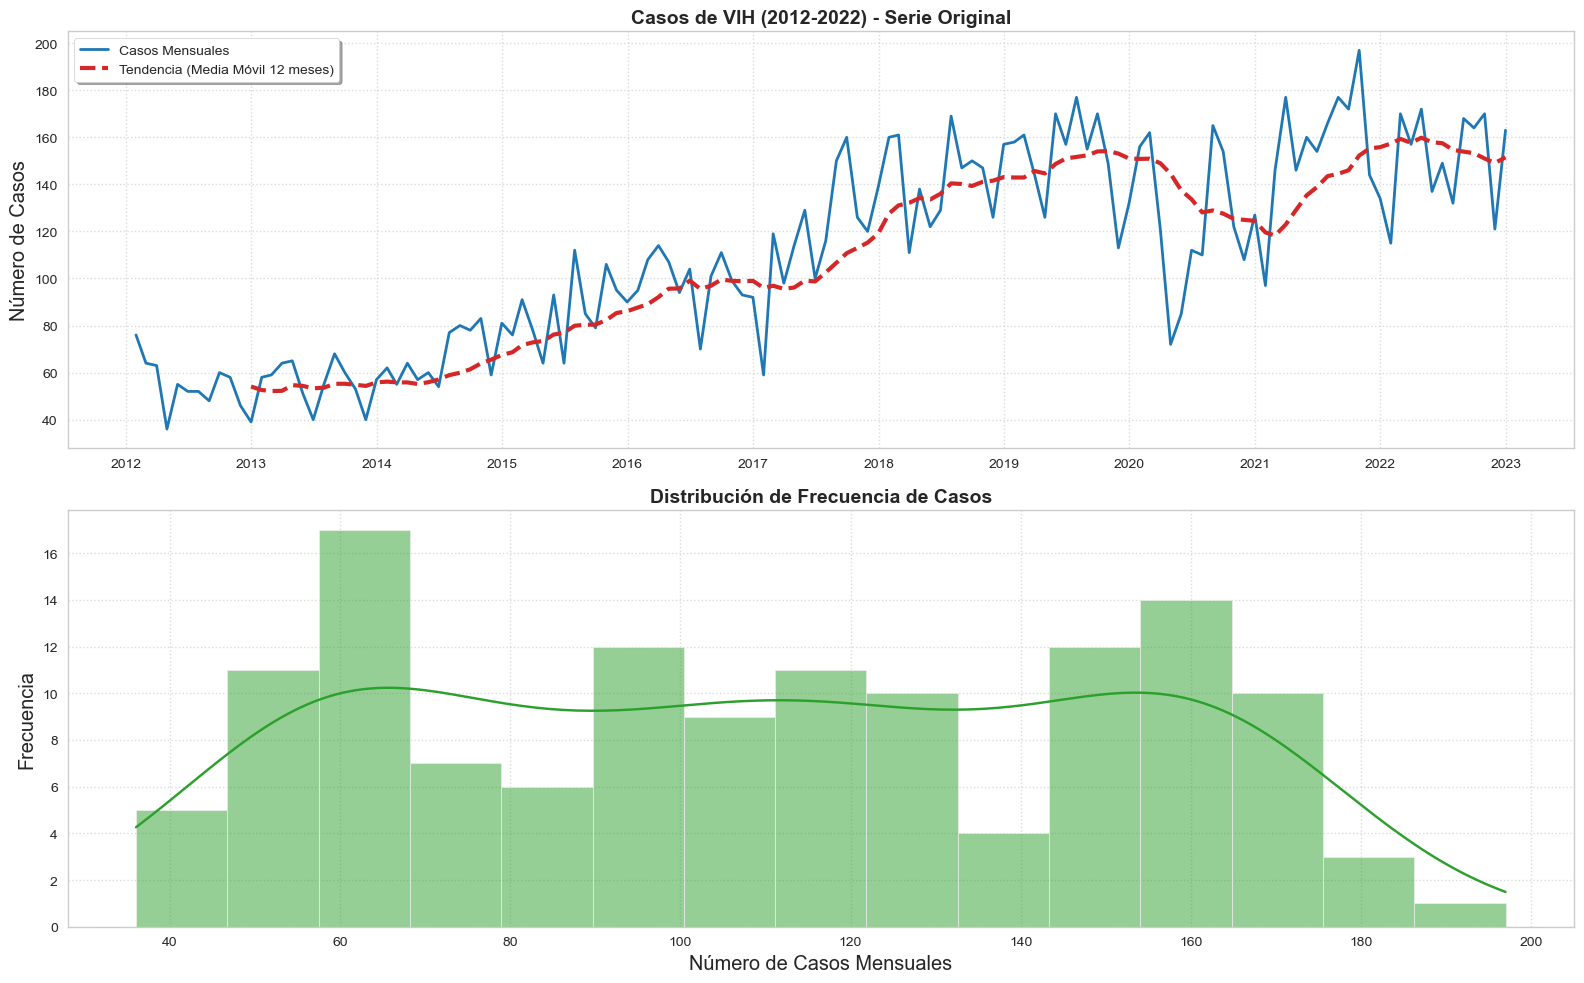


Prueba ADF: Primera Diferenciación
ADF Statistic           -9.48
p-value                  0.00
#Lags                    4.00
#Observations          126.00
Critical Value (1%)     -3.48
Critical Value (5%)     -2.88
Critical Value (10%)    -2.58

Conclusión: Serie ESTACIONARIA (p-value ≤ 0.05)

Prueba ADF: Diferenciación Estacional (12 meses)
ADF Statistic           -3.08
p-value                  0.03
#Lags                   13.00
#Observations          106.00
Critical Value (1%)     -3.49
Critical Value (5%)     -2.89
Critical Value (10%)    -2.58

Conclusión: Serie ESTACIONARIA (p-value ≤ 0.05)

Prueba ADF: Diferenciación Doble (Primera + Estacional)
ADF Statistic           -4.90
p-value                  0.00
#Lags                   13.00
#Observations          105.00
Critical Value (1%)     -3.49
Critical Value (5%)     -2.89
Critical Value (10%)    -2.58

Conclusión: Serie ESTACIONARIA (p-value ≤ 0.05)


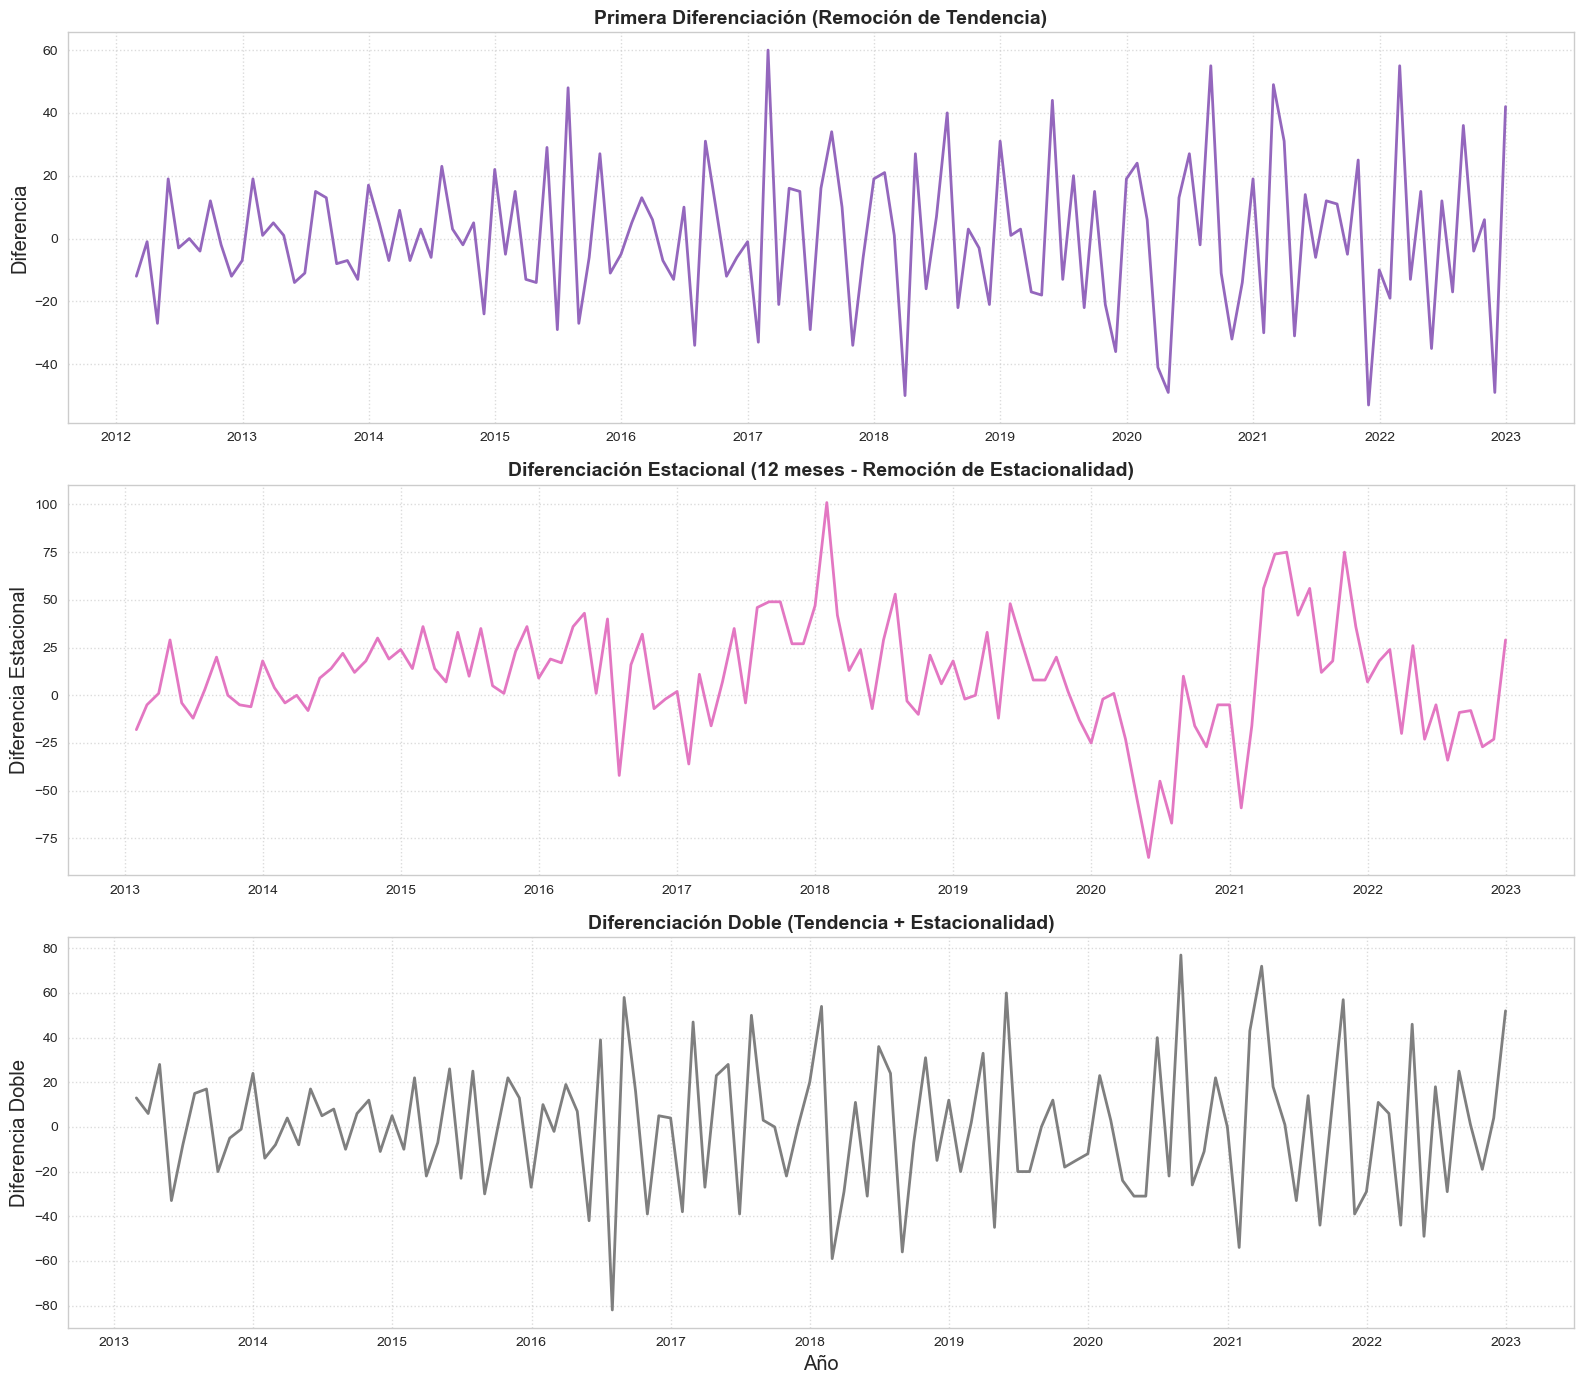

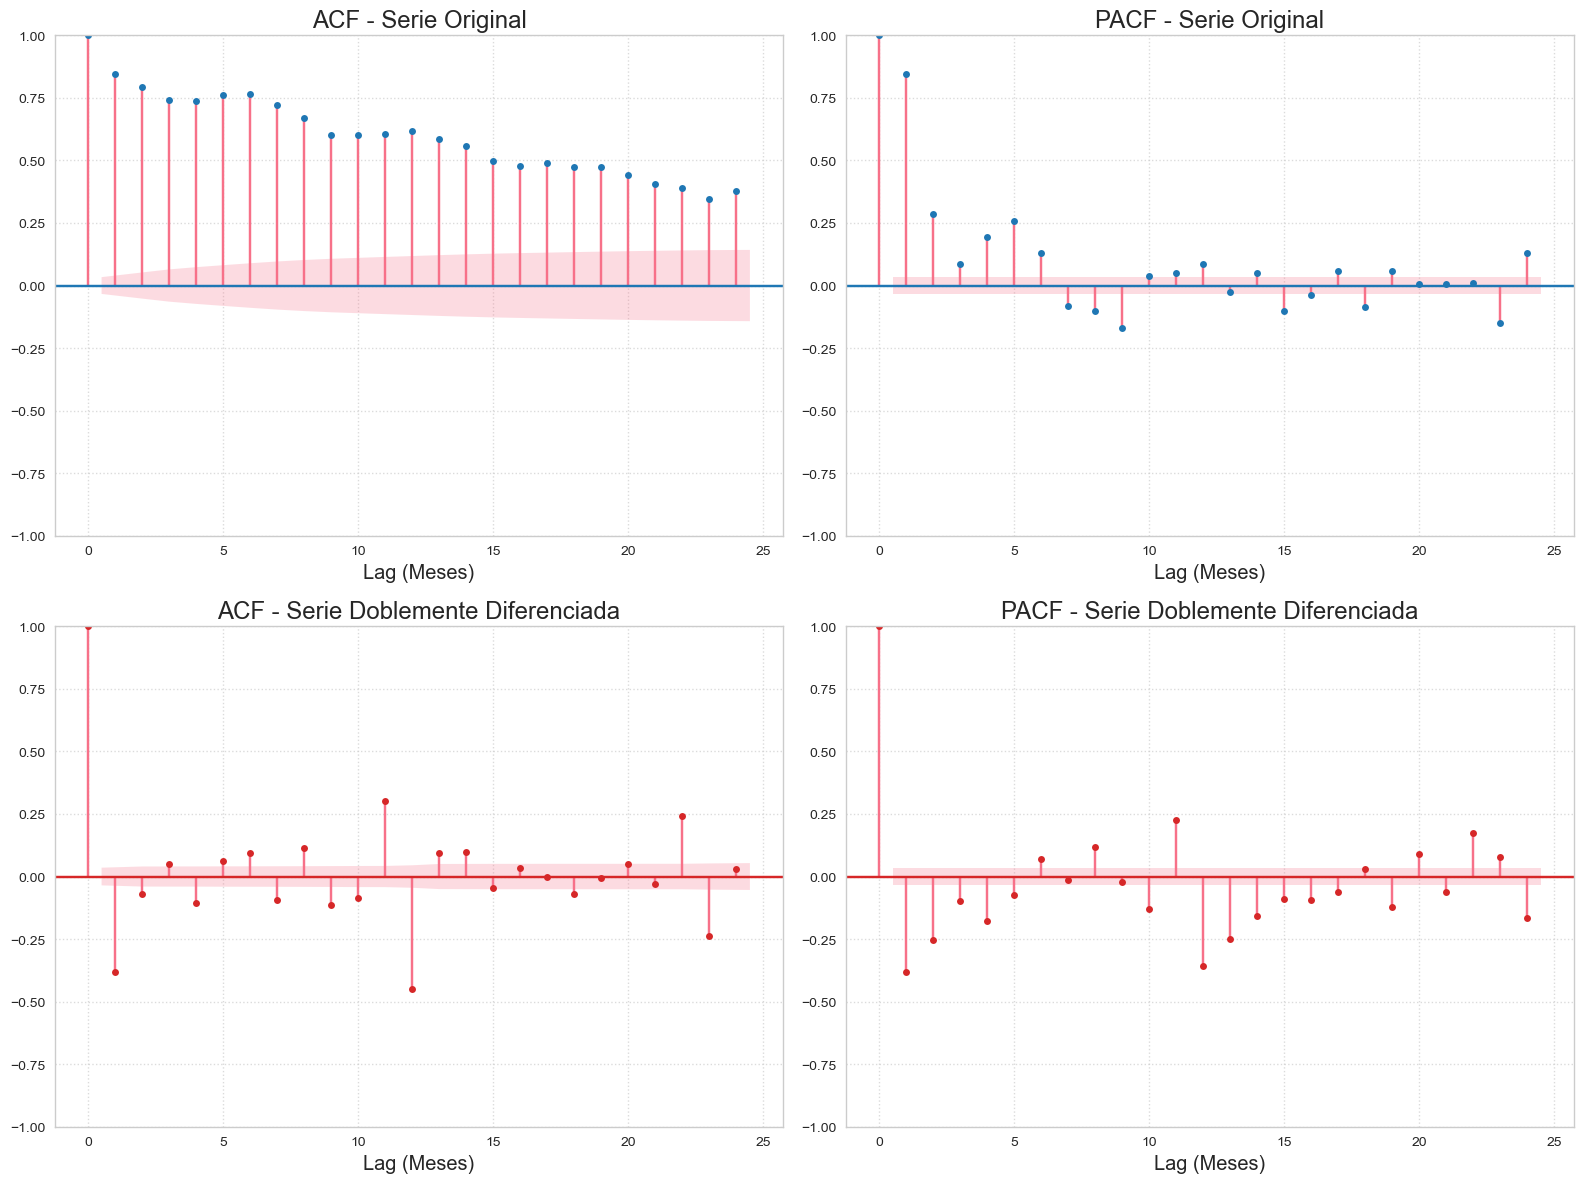


Comparación Estadística de Transformaciones

                 Media  Desviación Estándar  ADF Stat  p-value
Original        109.78                41.90     -1.04     0.74
Primera Dif.      0.66                22.83     -9.48     0.00
Dif. Estacional   9.74                28.93     -3.08     0.03
Dif. Doble        0.39                29.51     -4.90     0.00


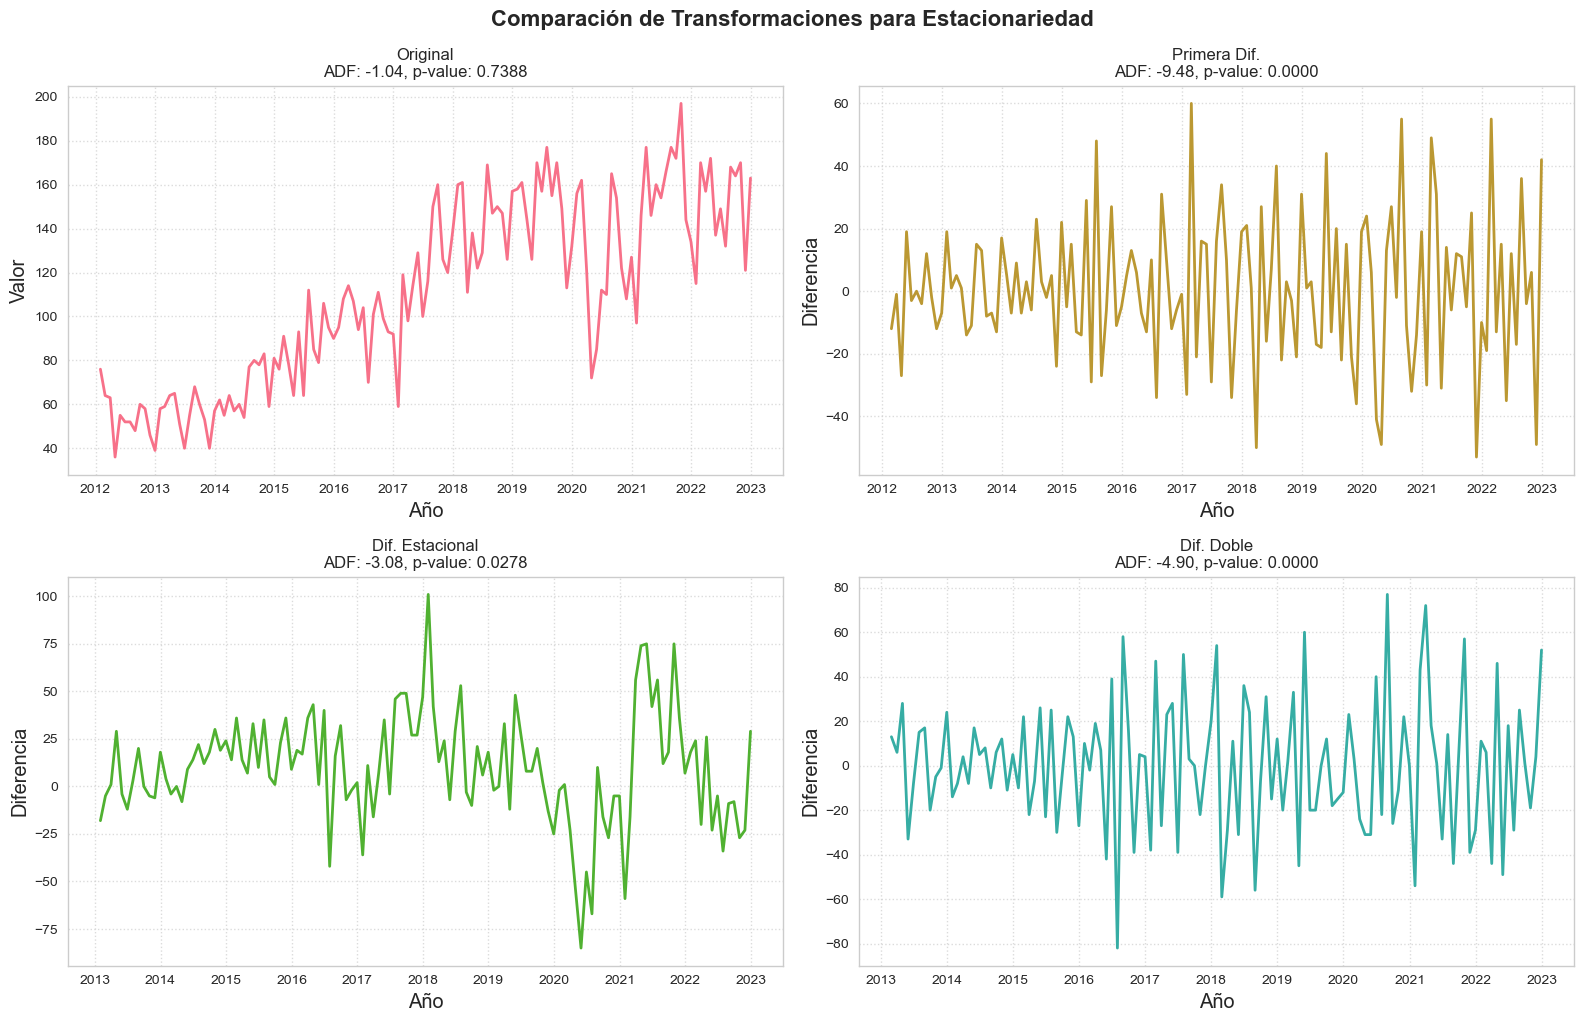


RECOMENDACIÓN: La mejor transformación es "Primera Dif."

Justificación:
- p-value: 0.0000 (≤ 0.05)
- Estabiliza la varianza (Desv. Estándar: 22.83)
- Estadístico ADF: -9.48 < Valores críticos

Esta transformación logra:
1. Remoción de tendencia y estacionalidad
2. Serie estacionaria según prueba ADF
3. Varianza relativamente estable

Puede utilizarse directamente para modelado ARIMA/SARIMA


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib import dates as mdates
import warnings

# Configuración profesional corregida
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')  # Estilo profesional corregido
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['font.size'] = 12
sns.set_palette("husl")
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Cargar y preparar datos
df = pd.read_excel('DATASET_VIH_LIMPIO_20250508_1728.xlsx', sheet_name='Datos VIH')
df['Fecha'] = pd.to_datetime(df['Fecha'])
df.set_index('Fecha', inplace=True)
ts = df.resample('M').size()['2012':'2022']

## 1. Función para prueba ADF mejorada
def adf_test(series, title=''):
    print(f'\n{"="*50}\nPrueba ADF: {title}\n{"="*50}')
    result = adfuller(series, autolag='AIC')
    labels = ['ADF Statistic','p-value','#Lags','#Observations']
    out = pd.Series(result[0:4], index=labels)
    
    for key,val in result[4].items():
        out[f'Critical Value ({key})'] = val
        
    print(out.to_string())
    
    if result[1] <= 0.05:
        print("\nConclusión: Serie ESTACIONARIA (p-value ≤ 0.05)")
    else:
        print("\nConclusión: Serie NO ESTACIONARIA (p-value > 0.05)")

## 2. Análisis de la serie original
adf_test(ts, 'Serie Original')

# Visualización profesional de la serie original
fig, ax = plt.subplots(2, 1, figsize=(16, 10))

# Serie temporal con tendencia
ax[0].plot(ts, label='Casos Mensuales', color='#1f77b4', linewidth=2)
ax[0].plot(ts.rolling(12).mean(), label='Tendencia (Media Móvil 12 meses)', 
           color='#d62728', linewidth=3, linestyle='--')
ax[0].set_title('Casos de VIH (2012-2022) - Serie Original', fontsize=14, fontweight='bold')
ax[0].set_ylabel('Número de Casos')
ax[0].legend(loc='upper left', frameon=True, shadow=True)
ax[0].xaxis.set_major_locator(mdates.YearLocator())
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax[0].grid(True, linestyle=':', alpha=0.7)

# Histograma y densidad
sns.histplot(ts, kde=True, ax=ax[1], color='#2ca02c', bins=15)
ax[1].set_title('Distribución de Frecuencia de Casos', fontsize=14, fontweight='bold')
ax[1].set_xlabel('Número de Casos Mensuales')
ax[1].set_ylabel('Frecuencia')
ax[1].grid(True, linestyle=':', alpha=0.7)

plt.tight_layout()
plt.show()

## 3. Aplicación de diferenciación
# Diferenciación simple (primer orden)
ts_diff = ts.diff().dropna()

# Diferenciación estacional (12 meses)
ts_seasonal_diff = ts.diff(12).dropna()

# Diferenciación doble (primero + estacional)
ts_double_diff = ts.diff().diff(12).dropna()

## 4. Pruebas ADF para series diferenciadas
adf_test(ts_diff, 'Primera Diferenciación')
adf_test(ts_seasonal_diff, 'Diferenciación Estacional (12 meses)')
adf_test(ts_double_diff, 'Diferenciación Doble (Primera + Estacional)')

## 5. Visualización profesional de series diferenciadas
fig, axes = plt.subplots(3, 1, figsize=(16, 14))

# Primera diferenciación
axes[0].plot(ts_diff, color='#9467bd', linewidth=2)
axes[0].set_title('Primera Diferenciación (Remoción de Tendencia)', 
                 fontsize=14, fontweight='bold')
axes[0].set_ylabel('Diferencia')
axes[0].xaxis.set_major_locator(mdates.YearLocator())
axes[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
axes[0].grid(True, linestyle=':', alpha=0.7)

# Diferenciación estacional
axes[1].plot(ts_seasonal_diff, color='#e377c2', linewidth=2)
axes[1].set_title('Diferenciación Estacional (12 meses - Remoción de Estacionalidad)', 
                 fontsize=14, fontweight='bold')
axes[1].set_ylabel('Diferencia Estacional')
axes[1].xaxis.set_major_locator(mdates.YearLocator())
axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
axes[1].grid(True, linestyle=':', alpha=0.7)

# Diferenciación doble
axes[2].plot(ts_double_diff, color='#7f7f7f', linewidth=2)
axes[2].set_title('Diferenciación Doble (Tendencia + Estacionalidad)', 
                 fontsize=14, fontweight='bold')
axes[2].set_ylabel('Diferencia Doble')
axes[2].set_xlabel('Año')
axes[2].xaxis.set_major_locator(mdates.YearLocator())
axes[2].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
axes[2].grid(True, linestyle=':', alpha=0.7)

plt.tight_layout()
plt.show()

## 6. Análisis de ACF/PACF para serie diferenciada
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# ACF/PACF original
plot_acf(ts, lags=24, ax=axes[0,0], color='#1f77b4', alpha=0.7, 
         title='ACF - Serie Original')
plot_pacf(ts, lags=24, ax=axes[0,1], color='#1f77b4', alpha=0.7, 
          title='PACF - Serie Original')

# ACF/PACF diferenciada
plot_acf(ts_double_diff, lags=24, ax=axes[1,0], color='#d62728', alpha=0.7, 
         title='ACF - Serie Doblemente Diferenciada')
plot_pacf(ts_double_diff, lags=24, ax=axes[1,1], color='#d62728', alpha=0.7, 
          title='PACF - Serie Doblemente Diferenciada')

for ax in axes.flatten():
    ax.grid(True, linestyle=':', alpha=0.7)
    ax.set_xlabel('Lag (Meses)')

plt.tight_layout()
plt.show()

## 7. Comparación estadística de transformaciones
transformations = {
    'Original': ts,
    'Primera Dif.': ts_diff,
    'Dif. Estacional': ts_seasonal_diff,
    'Dif. Doble': ts_double_diff
}

stats_df = pd.DataFrame({
    'Media': [x.mean() for x in transformations.values()],
    'Desviación Estándar': [x.std() for x in transformations.values()],
    'ADF Stat': [adfuller(x, autolag='AIC')[0] for x in transformations.values()],
    'p-value': [adfuller(x, autolag='AIC')[1] for x in transformations.values()]
}, index=transformations.keys())

print('\n' + '='*60)
print('Comparación Estadística de Transformaciones')
print('='*60 + '\n')
print(stats_df)

## 8. Visualización de comparación de transformaciones
plt.figure(figsize=(16, 10))

for i, (name, series) in enumerate(transformations.items()):
    plt.subplot(2, 2, i+1)
    plt.plot(series, color=f'C{i}', linewidth=2)
    plt.title(f'{name}\nADF: {stats_df.loc[name, "ADF Stat"]:.2f}, p-value: {stats_df.loc[name, "p-value"]:.4f}',
              fontsize=12)
    plt.xlabel('Año')
    plt.ylabel('Valor' if i==0 else 'Diferencia')
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.grid(True, linestyle=':', alpha=0.7)

plt.tight_layout()
plt.suptitle('Comparación de Transformaciones para Estacionariedad', 
             y=1.02, fontsize=16, fontweight='bold')
plt.show()

## 9. Recomendación final basada en análisis
best_method = stats_df[stats_df['p-value'] <= 0.05].sort_values('Desviación Estándar').index[0]
print('\n' + '='*60)
print(f'RECOMENDACIÓN: La mejor transformación es "{best_method}"')
print('='*60 + '\n')
print('Justificación:')
print(f'- p-value: {stats_df.loc[best_method, "p-value"]:.4f} (≤ 0.05)')
print(f'- Estabiliza la varianza (Desv. Estándar: {stats_df.loc[best_method, "Desviación Estándar"]:.2f})')
print(f'- Estadístico ADF: {stats_df.loc[best_method, "ADF Stat"]:.2f} < Valores críticos')
print('\nEsta transformación logra:')
print('1. Remoción de tendencia y estacionalidad')
print('2. Serie estacionaria según prueba ADF')
print('3. Varianza relativamente estable')
print('\nPuede utilizarse directamente para modelado ARIMA/SARIMA')

En la serie original, los resultados de la prueba ADF muestran que no es estacionaria (ADF = -1.04, p = 0.74), lo que significa que tiene una tendencia o cambios en el tiempo que impiden usar modelos como ARIMA de forma confiable. Para corregir esto, apliqué varias transformaciones. La primera fue la diferenciación simple (restar cada dato con el anterior), y esta funcionó muy bien: el ADF fue de -9.48 y el p-valor 0.00, lo que indica claramente que la serie se volvió estacionaria. Además, la desviación estándar bajó bastante (de 41.9 a 22.8), lo que quiere decir que la varianza también se estabilizó. Luego probé una diferenciación estacional (cada 12 meses), que también hizo la serie estacionaria pero con un resultado menos fuerte (ADF = -3.08, p = 0.03). Finalmente, combiné ambas (diferenciación doble) y, aunque también fue efectiva (ADF = -4.90, p = 0.00), la varianza quedó un poco más alta que con la primera sola. Comparando todas, la mejor transformación fue la primera diferenciación, porque logró que la serie fuera estacionaria de forma clara, redujo la varianza y eliminó la tendencia sin necesidad de complicar más el modelo. Esta transformación es la más recomendable para usar en modelos como ARIMA o SARIMA.

# Guardar nuevos datos estabilizados 

In [26]:
# Guardar como Excel
ts_diff.to_excel('serie_VIH_estacionaria.xlsx', sheet_name='Datos Transformados')